In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[ ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'] ]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1214a1b38>,
      dtype=object)

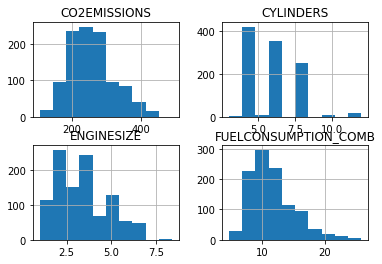

In [5]:
viz = cdf[ ['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB'] ]
viz.hist()
#plt.show()

Text(0, 0.5, 'Emission')

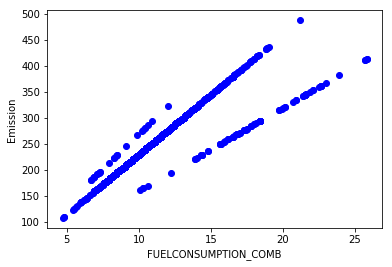

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
#plt.show()

Text(0, 0.5, 'Emission')

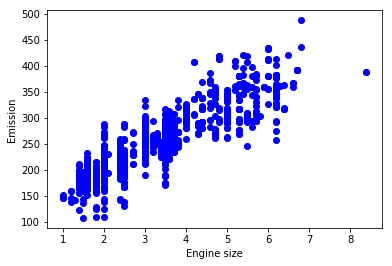

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
#plt.show()

Text(0, 0.5, 'Emission')

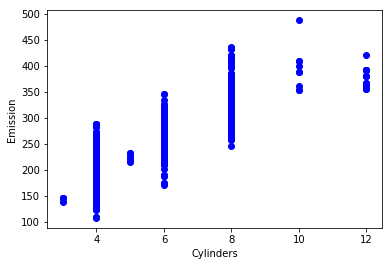

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print (msk)
train.head(5)
#test.head(5)

[ True False  True ...  True False  True]


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
5,3.5,6,10.0,230
6,3.5,6,10.1,232


In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print (regr)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficients:  [[39.05486903]]
Intercept:  [126.15514953]


Text(0, 0.5, 'Emission')

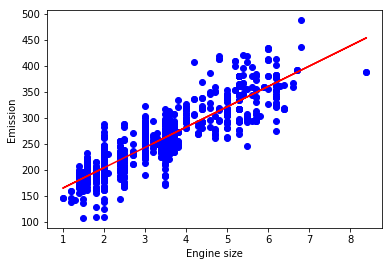

In [11]:
plt.scatter(train_x, train_y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print( "Mean absolute error: %.2f" % np.mean( np.absolute(test_y_ - test_y) ) )
print( "Residual sum of squares (MSE): %.2f" % np.mean( (test_y_ - test_y)**2 ) )
print( "R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 25.82
Residual sum of squares (MSE): 1142.87
R2-score: 0.58


In [13]:
cdf_mult = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf_mult.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [14]:
msk_mult = np.random.rand(len(df)) < 0.8
train_mult = cdf_mult[msk_mult]
test_mult = cdf_mult[~msk_mult]
print (msk, len(df), len(train_mult), len(test_mult))

[ True False  True ...  True False  True] 1067 844 223


In [15]:
from sklearn import linear_model
regr_mult = linear_model.LinearRegression()
x_mult = np.asanyarray(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_mult = np.asanyarray(train_mult[['CO2EMISSIONS']])
regr_mult.fit (x_mult, y_mult)
# The coefficients
print (regr_mult)
print ('Coefficients: ', regr_mult.coef_)
print ('Intercept: ',regr_mult.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficients:  [[11.40188294  7.67719822  9.23620307]]
Intercept:  [65.820741]


In [16]:
y_hat_mult = regr_mult.predict( test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']] )
x_test_mult = np.asanyarray( test_mult[ ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'] ] )
y_test_mult = np.asanyarray( test_mult[ ['CO2EMISSIONS'] ] )
print("Residual sum of squares: %.2f" % np.mean( (y_hat_mult - y_test_mult) ** 2 ) )

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_mult.score(x_test_mult, y_test_mult))

Residual sum of squares: 512.01
Variance score: 0.86


In [17]:
regr_mult = linear_model.LinearRegression()
x_mult = np.asanyarray(train_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_mult = np.asanyarray(train_mult[['CO2EMISSIONS']])
regr_mult.fit (x_mult, y_mult)
# The coefficients
print (regr_mult)
print ('Coefficients: ', regr_mult.coef_)
print ('Intercept: ',regr_mult.intercept_)

y_hat_mult = regr_mult.predict( test_mult[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']] )
x_test_mult = np.asanyarray( test_mult[ ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY'] ] )
y_test_mult = np.asanyarray( test_mult[ ['CO2EMISSIONS'] ] )
print("Residual sum of squares: %.2f" % np.mean( (y_hat_mult - y_test_mult) ** 2 ) )
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_mult.score(x_test_mult, y_test_mult))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Coefficients:  [[11.47889186  7.30526876  6.0093567   2.93729334]]
Intercept:  [66.97270422]
Residual sum of squares: 512.92
Variance score: 0.86
